In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("F:/Minor project dataset/Datasets/LoanExport.csv")

In [3]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [5]:
df['FirstPaymentDate'].dtype

dtype('int64')

In [6]:
df['FirstPaymentDate']=df['FirstPaymentDate'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:])
print(df['FirstPaymentDate'].head())
print(df['FirstPaymentDate'].tail())

0    1999-02
1    1999-02
2    1999-02
3    1999-02
4    1999-02
Name: FirstPaymentDate, dtype: object
291446    1999-03
291447    2002-10
291448    2003-04
291449    1999-04
291450    1999-03
Name: FirstPaymentDate, dtype: object


In [7]:
df['FirstPaymentYear']=df['FirstPaymentDate'].apply(lambda x: str(x)[:4])
df['FirstPaymentYear']

0         1999
1         1999
2         1999
3         1999
4         1999
          ... 
291446    1999
291447    2002
291448    2003
291449    1999
291450    1999
Name: FirstPaymentYear, Length: 291451, dtype: object

In [8]:
df['FirstPaymentMonth']=df['FirstPaymentDate'].apply(lambda x: str(x)[5:])
df['FirstPaymentMonth']

0         02
1         02
2         02
3         02
4         02
          ..
291446    03
291447    10
291448    04
291449    04
291450    03
Name: FirstPaymentMonth, Length: 291451, dtype: object

In [9]:
print(df['FirstPaymentYear'].dtype)
print(df['FirstPaymentMonth'].dtype)

object
object


In [10]:
df['C_FirstPaymentDate']=pd.to_datetime(df['FirstPaymentDate'],format="%Y-%m")
df['C_FirstPaymentDate'].tail()

291446   1999-03-01
291447   2002-10-01
291448   2003-04-01
291449   1999-04-01
291450   1999-03-01
Name: C_FirstPaymentDate, dtype: datetime64[ns]

In [11]:
df["MaturityDate"].dtype

dtype('int64')

In [12]:
df["MaturityDate"].tail()

291446    202902
291447    202904
291448    202904
291449    202903
291450    202902
Name: MaturityDate, dtype: int64

In [13]:
df["Maturity_Year"]=df["MaturityDate"].apply(lambda x:str(x)[:4])
df["Maturity_Month"]=df["MaturityDate"].apply(lambda x:str(x)[4:])

In [14]:
df["C_MaturityDate"]=pd.to_datetime(df["MaturityDate"],format="%Y%m")
df["C_MaturityDate"].tail()

291446   2029-02-01
291447   2029-04-01
291448   2029-04-01
291449   2029-03-01
291450   2029-02-01
Name: C_MaturityDate, dtype: datetime64[ns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291451 non-null  int64         
 1   FirstPaymentDate    291451 non-null  object        
 2   FirstTimeHomebuyer  291451 non-null  object        
 3   MaturityDate        291451 non-null  int64         
 4   MSA                 291451 non-null  object        
 5   MIP                 291451 non-null  int64         
 6   Units               291451 non-null  int64         
 7   Occupancy           291451 non-null  object        
 8   OCLTV               291451 non-null  int64         
 9   DTI                 291451 non-null  int64         
 10  OrigUPB             291451 non-null  int64         
 11  LTV                 291451 non-null  int64         
 12  OrigInterestRate    291451 non-null  float64       
 13  Channel             291451 no

<Axes: >

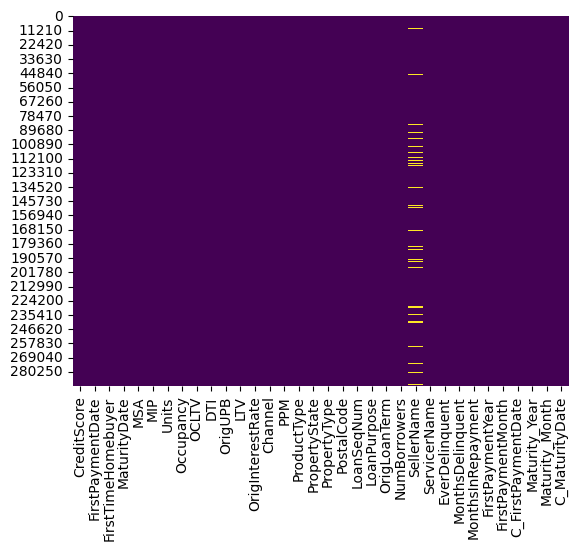

In [16]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [17]:
for col in df.columns :
    print('{} : {} \n'.format(col,df[col].unique()))
    print('-'*100)
    print('\n')

CreditScore : [  0 335 342 363 366 370 375 391 396 445 462 466 471 476 477 478 479 481
 482 483 485 486 487 489 490 491 492 493 494 495 496 497 498 499 500 501
 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537
 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555
 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573
 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591
 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609
 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627
 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645
 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663
 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681
 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699
 700 701 702 703 704 705 706 707 708 

In [18]:
from pandas.api.types import is_numeric_dtype

In [19]:
def summary_missing_values(df):
    output_df = pd.DataFrame(columns=['is_Numeric', 'has_X_values?', 'Conditions', 'Column_Description'])
    
    output_df.loc['CreditScore']        = [is_numeric_dtype(df['CreditScore']), 'False', "Scores <300 or >850 are “Not Available”", "The standardized credit score used to evaluate the borrower during the loan origination process." ]
    output_df.loc['FirstTimeHomebuyer'] = [is_numeric_dtype(df['FirstTimeHomebuyer']), 'True', "9 = Not Available", "The indicator denoting whether a borrower on the loan qualifies as a first-time homebuyer." ]
    output_df.loc['MSA']                = [is_numeric_dtype(df['MSA']), 'True', "None", "Mortgage Security Amount" ]
    output_df.loc['MIP']                = [is_numeric_dtype(df['MIP']), 'False', "MIP values > 55% will be disclosed as “Not Available”. 000= No MI; 999= Not Available", "The percentage of mortgage insurance coverage obtained at origination in effect at the time the security was issued." ]
    output_df.loc['Units']              = [is_numeric_dtype(df['Units']), 'False', "99 = Not Available", "The number of dwelling units in the mortgaged property at the time the loan was originated: 1, 2, 3 or 4." ]
    output_df.loc['Occupancy']          = [is_numeric_dtype(df['Occupancy']), 'False', "None", "The classification describing the property occupancy status at the time the loan was originated." ]
    output_df.loc['OCLTV']              = [is_numeric_dtype(df['OCLTV']), 'False', "99 = Not Available", "The ratio, expressed as a percentage, obtained by dividing the amount of all known outstanding loans at origination by the value of the property." ]
    output_df.loc['DTI']                = [is_numeric_dtype(df['DTI']), 'False', "Percentages < 1% or > 65% will be disclosed as “Not Available,”", "The ratio obtained by dividing the total monthly debt expense by the total monthly income of the borrower at the time the loan was originated or modified. " ]
    output_df.loc['LTV']                = [is_numeric_dtype(df['LTV']), 'False', "Percentages < 1% or > than 998% will be disclosed as “Not Available,”. 999 = Not Available.", "The ratio, expressed as a percentage, obtained by dividing the amount of the loan at origination by the value of the property. " ]
    output_df.loc['OrigInterestRate']   = [is_numeric_dtype(df['OrigInterestRate']), 'False', "If value <0 or >25, then the rate is considered not available", "The interest rate of the loan as stated on the note at the time the loan was originated."]
    output_df.loc['Channel']            = [is_numeric_dtype(df['Channel']), 'False', "9 = Not Available", "The origination channel used by the party that delivered the loan to the issuer." ]
    output_df.loc['PPM']                = [is_numeric_dtype(df['PPM']), 'True', "9 = Not Available", "The indicator denoting whether the borrower is subject to a penalty for early payment of principal." ]
    output_df.loc['PropertyType']       = [is_numeric_dtype(df['PropertyType']), 'True', "None", "The classification describing the type of property that secures the loan." ]
    output_df.loc['PostalCode']         = [is_numeric_dtype(df['PostalCode']), 'True', "None", "-" ]
    output_df.loc['NumBorrowers']       = [is_numeric_dtype(df['NumBorrowers']), 'True', "99 = Not Available", "The number of borrowers who, at the time the loan was originated, are obligated to repay the loan: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10. " ]
    output_df.loc['SellerName']         = [is_numeric_dtype(df['SellerName']), 'False', "None", "The name of the entity that sold the loan to the issuer." ]
    output_df.loc['ServicerName']       = [is_numeric_dtype(df['ServicerName']), 'False', "None", "The name of the entity that services the loan during the current reporting period." ]
    output_df.loc['EverDelinquent']     = [is_numeric_dtype(df['EverDelinquent']), 'False', "None", "Target column" ]
    output_df.loc['MonthsDelinquent']   = [is_numeric_dtype(df['MonthsDelinquent']), 'False', "9 = Not Available", "The number of days for which a mortgage loan has been reported delinquent." ]
    output_df.loc['MonthsInRepayment']  = [is_numeric_dtype(df['MonthsInRepayment']), 'False', "None", "-" ]
    #output_df.loc[''] = [is_numeric_dtype(df['']), 'False', "9 = Not Available", "" ]
    
    return output_df
    
pd.set_option('display.max_colwidth', None)
output_df=summary_missing_values(df)

In [20]:
columns_with_X_values = ['FirstTimeHomebuyer', 'MSA', 'PPM', 'PropertyType', 'PostalCode', 'NumBorrowers']
def replace_X_values_by_nan(df):
    df.loc[df['FirstTimeHomebuyer'] == 'X', 'FirstTimeHomebuyer'] = np.nan
    df.loc[df['MSA'] == 'X    ', 'MSA']                           = np.nan
    df.loc[df['PPM'] == 'X', 'PPM']                               = np.nan
    df.loc[df['PropertyType'] == 'X ' , 'PropertyType']           = np.nan
    df.loc[df['PostalCode'] == 'X    ' , 'PostalCode']            = np.nan
    df.loc[df['NumBorrowers'] == 'X ' , 'NumBorrowers']           = np.nan
    
    return df

df = replace_X_values_by_nan(df)

In [21]:
for col in columns_with_X_values:
    print('{} : {}\n'.format(col, df[col].unique()))
    print('-'*100)
    print('\n')

FirstTimeHomebuyer : ['N' nan 'Y']

----------------------------------------------------------------------------------------------------


MSA : ['16974' '19740' '29940' '31084' '35644' nan '36740' '25540' '48620'
 '12060' '12420' '13140' '13644' '15764' '16700' '16940' '17900' '19124'
 '20500' '20764' '21340' '22380' '22744' '23060' '23104' '24660' '24860'
 '25060' '26900' '27060' '27140' '27260' '28420' '29404' '30780' '31340'
 '33124' '33340' '33460' '34820' '35004' '35084' '35380' '37100' '38060'
 '38300' '38900' '39300' '39340' '39820' '40060' '40140' '40900' '41180'
 '41620' '41700' '41740' '41884' '42044' '42220' '42644' '43900' '46060'
 '46700' '47644' '47894' '49180' '49420' '11340' '12100' '14500' '17820'
 '17860' '19340' '19804' '28140' '29740' '36084' '36500' '37460' '42060'
 '47260' '48424' '12580' '14484' '14860' '19380' '26420' '29420' '29620'
 '36540' '37764' '37860' '37964' '38940' '40380' '45300' '19660' '11300'
 '11460' '12220' '12940' '13820' '13980' '14740' '15540'

In [22]:
df[(df['CreditScore']<300)]['CreditScore']

0       0
1       0
2       0
3       0
4       0
       ..
1184    0
1185    0
1186    0
1187    0
1188    0
Name: CreditScore, Length: 1189, dtype: int64

In [23]:
df[(df['CreditScore'] >850) | (df['CreditScore']==9999)]['CreditScore']

Series([], Name: CreditScore, dtype: int64)

In [24]:
df[(df['MIP'] > 55) | (df['MIP']== 999)]['MIP']

Series([], Name: MIP, dtype: int64)

In [25]:
df['Occupancy'].value_counts()

Occupancy
O    276131
I      8734
S      6586
Name: count, dtype: int64

In [26]:
df[(df['DTI']<1) | (df['DTI'] > 65) | (df['DTI'] ==999)]['DTI']

140       0
167       0
176       0
179       0
186       0
         ..
291438    0
291441    0
291442    0
291443    0
291447    0
Name: DTI, Length: 17796, dtype: int64

In [27]:
df[(df["LTV"] < 1)]["LTV"]

31098     0
88463     0
233257    0
276981    0
287773    0
Name: LTV, dtype: int64

In [28]:
df[(df["LTV"] > 998) | (df["LTV"] == 999)]["LTV"]

Series([], Name: LTV, dtype: int64)

In [29]:
df[(df.OrigInterestRate < 0) | (df.OrigInterestRate > 25)].OrigInterestRate

Series([], Name: OrigInterestRate, dtype: float64)

In [30]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment',
       'FirstPaymentYear', 'FirstPaymentMonth', 'C_FirstPaymentDate',
       'Maturity_Year', 'Maturity_Month', 'C_MaturityDate'],
      dtype='object')

In [31]:
def matching_description_conditions(data):
    # replacing all credit score values less than 300 by np.nan
    data.loc[data['CreditScore'] < 300, 'CreditScore'] = np.nan
    data.loc[data['DTI'] < 1, 'DTI'] = np.nan
    data.loc[data['LTV'] < 1, 'LTV'] = np.nan
    
    return data

df = matching_description_conditions(df)

In [32]:
df.isnull().sum().sort_values(ascending=False)

FirstTimeHomebuyer    78015
MSA                   39100
SellerName            24994
DTI                   17796
PPM                    5405
CreditScore            1189
NumBorrowers            339
PropertyType             22
PostalCode                6
LTV                       5
OCLTV                     0
MIP                       0
Maturity_Month            0
Maturity_Year             0
C_FirstPaymentDate        0
FirstPaymentMonth         0
FirstPaymentYear          0
MonthsInRepayment         0
MonthsDelinquent          0
EverDelinquent            0
ServicerName              0
MaturityDate              0
OrigLoanTerm              0
Occupancy                 0
LoanPurpose               0
LoanSeqNum                0
FirstPaymentDate          0
PropertyState             0
ProductType               0
Units                     0
Channel                   0
OrigInterestRate          0
OrigUPB                   0
C_MaturityDate            0
dtype: int64

<Axes: >

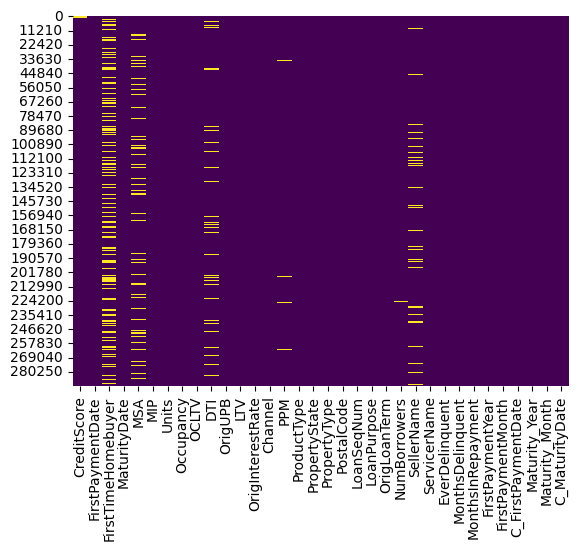

In [33]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [34]:
cols_to_impute_with_mode = ['FirstTimeHomebuyer', 'SellerName', 'PPM', 'PropertyType']
cols_to_impute_with_mean = ['MSA', 'DTI', 'CreditScore', 'NumBorrowers', 'LTV']
for col in cols_to_impute_with_mode:
    df[col].fillna(df[col].mode().iloc[0],inplace=True)

for col in cols_to_impute_with_mean:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(),inplace=True)

In [35]:
df.isnull().sum().sort_values(ascending=False)

PostalCode            6
EverDelinquent        0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
CreditScore           0
FirstPaymentDate      0
MonthsInRepayment     0
FirstPaymentYear      0
FirstPaymentMonth     0
C_FirstPaymentDate    0
Maturity_Year         0
Maturity_Month        0
MonthsDelinquent      0
PropertyType          0
PropertyState         0
ProductType           0
PPM                   0
Channel               0
OrigInterestRate      0
LTV                   0
OrigUPB               0
DTI                   0
OCLTV                 0
Occupancy             0
Units                 0
MIP                   0
MSA                   0
MaturityDate          0
FirstTimeHomebuyer    0
C_MaturityDate        0
dtype: int64

In [36]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment',
       'FirstPaymentYear', 'FirstPaymentMonth', 'C_FirstPaymentDate',
       'Maturity_Year', 'Maturity_Month', 'C_MaturityDate'],
      dtype='object')

In [37]:
df.drop('FirstPaymentDate', axis=1, inplace=True)
df.drop('MaturityDate', axis=1, inplace=True)
df.drop(df[df['Units'] == 0].index, inplace=True)
df.drop(['ProductType', 'PostalCode', 'LoanSeqNum'], axis = 1, inplace=True)

In [38]:
df['MSA']=df['MSA'].astype(int)

In [39]:
df['NumBorrowers']=df['NumBorrowers'].astype(int)

In [40]:
df['FirstTimeHomebuyer']=df['FirstTimeHomebuyer'].map({'N':0,'Y':1}).astype(int)
df['PPM']=df['PPM'].map({'N':0,'Y':1}).astype(int)

In [41]:
df['ServicerName'] = df['ServicerName'].map(str.strip)

In [42]:
df[['ServicerName']] = df[['ServicerName']].replace(dict.fromkeys(['COUNTRYWIDE',
                                                                       'BANKOFAMERICANA',
                                                                       'WASHINGTONMUTUALBANK',
                                                                       'CHASEMANHATTANMTGECO',
                                                                       'ABNAMROMTGEGROUPINC',
                                                                       'WELLSFARGOHOMEMORTGA',
                                                                       'GMACMTGECORP',
                                                                       'CHASEMTGECO',
                                                                       'NATLCITYMTGECO',
                                                                       'WELLSFARGOBANKNA',
                                                                       'JPMORGANCHASEBANKNA',
                                                                       'SUNTRUSTMORTGAGEINC',
                                                                       'CITIMORTGAGEINC'],     'Major Banks'))

df[['ServicerName']] = df[['ServicerName']].replace(dict.fromkeys(['BAMORTGAGELLC',
                                                                       'FTMTGESERVICESINC',
                                                                       'PRINCIPALRESIDENTIAL',
                                                                       'CHASEHOMEFINANCELLC',
                                                                       'HOMESIDELENDINGINC'],  'Non-Bank Servicers'))

df[['ServicerName']] = df[['ServicerName']].replace(dict.fromkeys(['Other servicers',
                                                                       'FIFTHTHIRDBANK'],      'Other Servicers'))

In [43]:
df['ServicerName'].unique()

array(['Major Banks', 'Non-Bank Servicers', 'Other Servicers'],
      dtype=object)

In [44]:
df[['PropertyState']] = df[['PropertyState']].replace(dict.fromkeys(['NY', 'PA', 'NJ', 'MA', 'CT', 'RI'],     
                                                                        'Northeast'))
df[['PropertyState']] = df[['PropertyState']].replace(dict.fromkeys(['FL', 'TX', 'GA', 'NC', 'VA', 'SC', 'AL', 'KY', 'TN', 'MS', 'LA'],  
                                                                        'South'))
df[['PropertyState']] = df[['PropertyState']].replace(dict.fromkeys(['CA', 'WA', 'OR'],      
                                                                        'West Coast'))
df[['PropertyState']] = df[['PropertyState']].replace(dict.fromkeys(['MI', 'IL', 'OH', 'IN', 'MO', 'MN', 'WI', 'IA'], 
                                                                        'Midwest'))
df[['PropertyState']] = df[['PropertyState']].replace(dict.fromkeys(['CO', 'AZ', 'MD', 'UT', 'NV', 'KS', 'ID', 'NM', 'OK', 'NE', 'NH', 'VT', 'AR', 'MT', 'DE', 'ME', 'PR', 'HI', 'WV', 'WY', 'DC', 'SD', 'ND', 'AK', 'GU'], 
                                                                        'Others'))

In [45]:
df.PropertyState.unique()

array(['Midwest', 'Others', 'West Coast', 'Northeast', 'South'],
      dtype=object)

In [46]:
df.to_csv("Preprocessed_Data_Improved_By_VASU_N1.csv")